In [14]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

In [15]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

OSError: SavedModel file does not exist at: /var/folders/5t/1q33q0zs6wv2qf07qxd840n80000gn/T/tfhub_modules/426589ad685896ab7954855255a52db3442cb38d/{saved_model.pbtxt|saved_model.pb}

In [16]:
testimage = Image.open('/Users/matthewyu/Downloads/goldfish.jpeg').resize(IMAGE_SHAPE)
testimage = np.array(testimage)/255.0
testimage = testimage[:,:,:3]
testimage.shape

testimage[np.newaxis, ...].shape

(1, 224, 224, 3)

In [17]:
result = classifier.predict(testimage[np.newaxis,...])
result.shape

predicted_label_index=np.argmax(result)

predicted_label_index

NameError: name 'classifier' is not defined

In [18]:
import pathlib

In [19]:
data_dir = pathlib.Path('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES')

In [20]:
data_dir

PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES')

In [21]:
list(data_dir.glob('*/*.jpeg'))[:5]

[PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-12.jpeg'),
 PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-4.jpeg'),
 PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-8.jpeg'),
 PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-9.jpeg'),
 PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazm

In [22]:
jasmine = list(data_dir.glob('Jazmine/*'))
jasmine[:5]

[PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-12.jpeg'),
 PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-4.jpeg'),
 PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-8.jpeg'),
 PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-9.jpeg'),
 PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazm

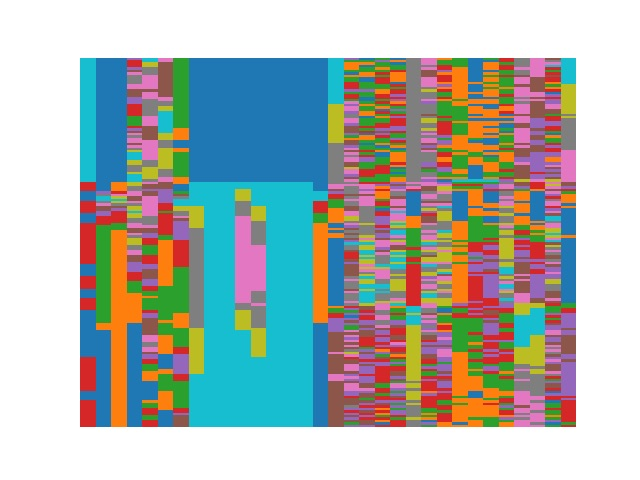

In [23]:
Image.open(str(jasmine[1]))

In [24]:
tea_images_dict = {
    'jasmine' : list(data_dir.glob('Jazmine/*')),
    'oolong' : list(data_dir.glob('Oolong/*'))
}

In [25]:
tea_labels_dict = {
    'jasmine' : 0,
    'oolong' : 1,
}
tea_images_dict

{'jasmine': [PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-12.jpeg'),
  PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-4.jpeg'),
  PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-8.jpeg'),
  PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-9.jpeg'),
  PosixPath('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMA

In [26]:
str(tea_images_dict['jasmine'][0])

'/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/IMAGES/Jazmine/Jazmine-sample-12.jpeg'

In [27]:
img = cv2.imread(str(tea_images_dict['jasmine'][0]))
img.shape

(480, 640, 3)

In [28]:
X, y = [], []

for tea_name, images, in tea_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(tea_labels_dict[tea_name])

In [29]:
resized_img.shape

(224, 224, 3)

In [30]:
X = np.array(X)
y = np.array(y)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [32]:
 X_train_scaled = X_train / 255

In [33]:
X_test_scaled = X_test / 255

In [35]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False)

In [40]:
num_of_tea = 2 

model = tf.keras.Sequential([
    pretrained_model_without_top_layer, 
    tf.keras.layers.Dense(num_of_tea)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
model.compile(
    optimizer= "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc'])

history = model.fit(X_train_scaled, y_train, epochs=20, validation_split = 0.2)

Train on 28 samples, validate on 8 samples
Epoch 1/20
28/28 [==============================] - 6s 213ms/sample - loss: 0.7662 - acc: 0.4286 - val_loss: 0.8267 - val_acc: 0.0000e+00
Epoch 2/20
28/28 [==============================] - 2s 86ms/sample - loss: 0.7170 - acc: 0.4286 - val_loss: 0.7852 - val_acc: 0.1250
Epoch 3/20
28/28 [==============================] - 3s 99ms/sample - loss: 0.6705 - acc: 0.6071 - val_loss: 0.7463 - val_acc: 0.5000
Epoch 4/20
28/28 [==============================] - 2s 75ms/sample - loss: 0.6288 - acc: 0.6786 - val_loss: 0.7072 - val_acc: 0.5000
Epoch 5/20
28/28 [==============================] - 2s 68ms/sample - loss: 0.5898 - acc: 0.7500 - val_loss: 0.6701 - val_acc: 0.6250
Epoch 6/20
28/28 [==============================] - 2s 82ms/sample - loss: 0.5537 - acc: 0.8929 - val_loss: 0.6366 - val_acc: 0.8750
Epoch 7/20
28/28 [==============================] - 2s 76ms/sample - loss: 0.5212 - acc: 0.8929 - val_loss: 0.6051 - val_acc: 0.8750
Epoch 8/20
28/28 [===

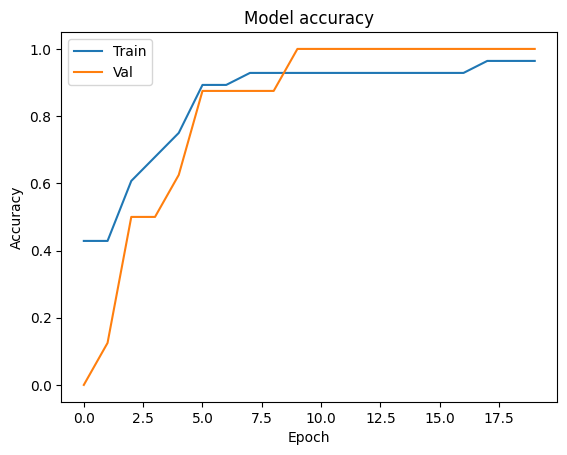

In [42]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

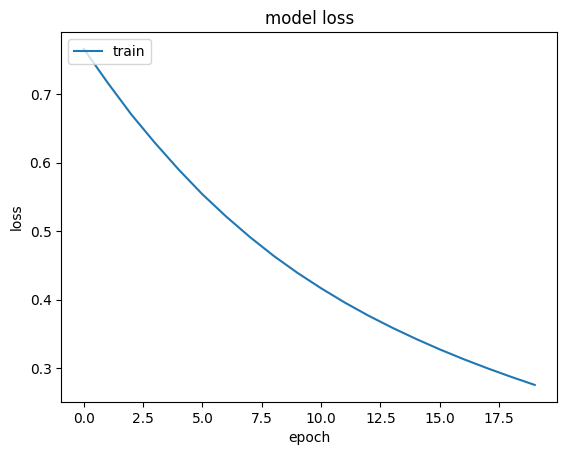

In [43]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc= 'upper left')
plt.show()

In [53]:
model.save("SmellClassifier")

2023-01-18 20:08:11.602127: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: SmellClassifier/assets


INFO:tensorflow:Assets written to: SmellClassifier/assets


In [55]:
new_model = keras.models.load_model("SmellClassifier")

2023-01-18 20:10:01.066873: W tensorflow/core/graph/graph_constructor.cc:761] Node 'StatefulPartitionedCall' has 71 outputs but the _output_shapes attribute specifies shapes for 605 outputs. Output shapes may be inaccurate.
2023-01-18 20:10:01.108160: W tensorflow/core/graph/graph_constructor.cc:761] Node 'StatefulPartitionedCall' has 1 outputs but the _output_shapes attribute specifies shapes for 605 outputs. Output shapes may be inaccurate.


In [67]:
verifyimage = Image.open('/Users/matthewyu/Library/CloudStorage/GoogleDrive-matttxusa@gmail.com/.shortcut-targets-by-id/0B6zsq5YjjxeBNWNLdmgyWXZHX00/Matthew Yu/2023Science/Jan18/Verification/Oolong-sample-33.jpeg').resize(IMAGE_SHAPE)
verifyimage = np.array(testimage)/255.0
verifyimage = testimage[:,:,:3]
verifyimage.shape

verifyimage[np.newaxis, ...].shape

(1, 224, 224, 3)

In [68]:
result = new_model.predict(testimage[np.newaxis,...])
result.shape

predicted_label_index=np.argmax(result)

predicted_label_index

0